<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [48]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

def sub(t, x, start, end):
    return t[start:end], x[start:end]

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

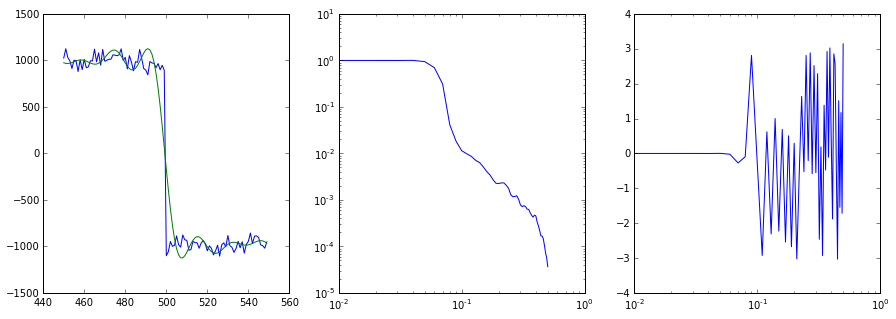

In [76]:
X1 = np.fft.fft(xn)
N1 = np.shape(xn)[0]
f1 = np.linspace(0,1./dt,N)

X1[(f1>0.06) & (f1<(1./dt-0.06))] = 1.e-15
y1 = np.real(np.fft.ifft(X1))+np.mean(xn)

Gyy1, ff = mlab.psd(y1, Fs=1, NFFT=100, noverlap=50)
Gxx1, ff = mlab.psd(xn, Fs=1, NFFT=100, noverlap=50)
Gxy1, ff1 = mlab.csd(xn, y1, Fs=1, NFFT=100, noverlap=50)
H1 = np.sqrt(Gyy1/Gxx1)
angH1 = np.angle(Gxy1)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1,3,1); 
ax1.plot(t[450:550], xn[450:550])
ax1.plot(t[450:550], y1[450:550])

ax2 = plt.subplot(1,3,2)
ax2.loglog(ff, H1)

ax3 = plt.subplot(1,3,3)
ax3.semilogx(ff, angH1)

The filtered signal follows decently, it's certainly filtering out the high frequencies, but a phase shift is evident.

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

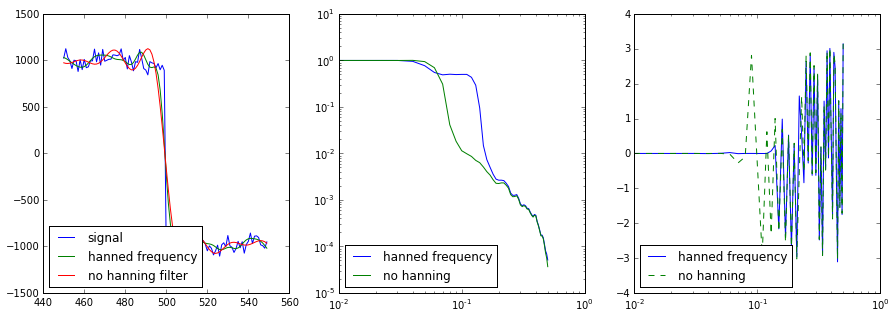

In [78]:
X2 = np.fft.fft(xn)
N = np.shape(xn)[0]
f = np.linspace(0,1./dt,N)
hwin = np.hanning(f.size)
fhwin = f*hwin

X2[(fhwin>0.06) & (fhwin<(1./dt-0.06))] = 1.e-15
y2 = np.real(np.fft.ifft(X))+np.mean(xn)

Gyy2, ff = mlab.psd(y2, Fs=1, NFFT=100, noverlap=50)
Gxy2, ff2 = mlab.csd(xn, y2, Fs=1, NFFT=100, noverlap=50)
H2 = np.sqrt(Gyy2/Gxx)
angH2 = np.angle(Gxy2)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1,3,1); 
ax1.plot(t[450:550], xn[450:550], label='signal')
ax1.plot(t[450:550], y2[450:550], label='hanned frequency')
ax1.plot(t[450:550], y1[450:550], label='no hanning filter')
ax1.legend(loc=3)


ax2 = plt.subplot(1,3,2)
ax2.loglog(ff2, H2, label='hanned frequency')
ax2.loglog(ff1, H1, label='no hanning')
ax2.legend(loc=3)

ax3 = plt.subplot(1,3,3)
ax3.semilogx(ff, angH2, label='hanned frequency')
ax3.semilogx(ff, angH1, 'g--', label='no hanning')
ax3.legend(loc=3)

Some higher frequencies are less attenuated, the roll-off has a bit of a plateau in it. The phaseshift is pushed up to higher frequencies by using the hanning window.

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

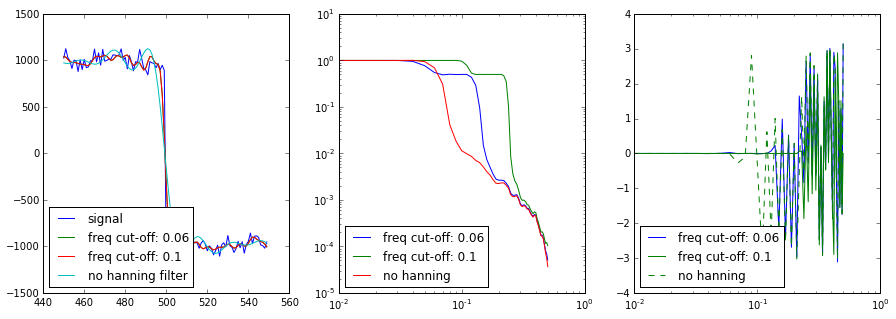

In [87]:
cutoff = 0.1
X3 = np.fft.fft(xn)
X3[(fhwin>cutoff) & (fhwin<(1./dt-cutoff))] = 1.e-15
y3 = np.real(np.fft.ifft(X3))+np.mean(xn)

Gyy3, ff = mlab.psd(y3, Fs=1, NFFT=100, noverlap=50)
Gxx3, ff = mlab.psd(xn, Fs=1, NFFT=100, noverlap=50)
Gxy3, ff3 = mlab.csd(xn, y3, Fs=1, NFFT=100, noverlap=50)
H3 = np.sqrt(Gyy3/Gxx3)
angH3 = np.angle(Gxy3)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1,3,1); 
ax1.plot(t[450:550], xn[450:550], label='signal')
ax1.plot(t[450:550], y[450:550], label='freq cut-off: 0.06')
la = 'freq cut-off: ' + str(cutoff)
ax1.plot(t[450:550], y[450:550], label=la)
ax1.plot(t[450:550], y1[450:550], label='no hanning filter')
ax1.legend(loc=3)

ax2 = plt.subplot(1,3,2)
ax2.loglog(ff2, H2, label='freq cut-off: 0.06')
ax2.loglog(ff3, H3, label=la)
ax2.loglog(ff1, H1, label='no hanning')
ax2.legend(loc=3)

ax3 = plt.subplot(1,3,3)
ax3.semilogx(ff2, angH2, label='freq cut-off: 0.06')
ax3.semilogx(ff3, angH3, label=la)
ax3.semilogx(ff1, angH1, 'g--', label='no hanning')
ax3.legend(loc=3)

looks good, the 0.03Hz is totally well represented now.

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

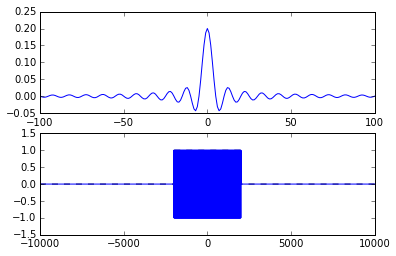

In [179]:
N=20000
t = np.arange(N*1.)
x = np.cumsum(np.random.randn(N))
x = x-np.mean(x)
fc = 0.1
M = fc*2*N+1
k = np.array(range(-N/2, N/2))
h = (1./N)*np.sin(np.pi*(k+0.000001)*M/N)/np.sin(np.pi*(k+0.000001)/N)
H = N*np.fft.fftshift(np.fft.ifft(h))


plt.subplots(2,1)
ax1 = plt.subplot(2,1,1); ax1.plot(k, h); ax1.set_xlim(-100, 100)
Hideal = h*0. + 1.
Hideal[abs(k)>(M-1)/2] = 0
ax2 = plt.subplot(2,1,2); ax2.plot(k, Hideal, 'k--'); #ax2.set_ylim(-0.1, 1.1)
ax2.plot(k, H)

[-4.60262582 -6.19643636 -8.57465075 ...,  7.59569271  5.99407686
  4.20643112]


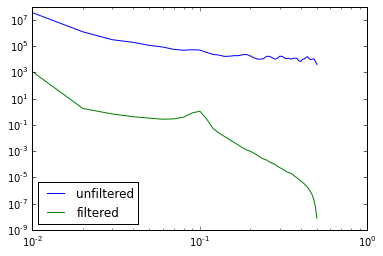

In [157]:
print np.convolve(x,hs, 'same')
Gxxf, fx = mlab.psd(x, Fs=1, NFFT=100, noverlap=50)
Gxxf, fx = mlab.psd(np.convolve(x,hs, 'same'), Fs=1, NFFT=100, noverlap=50)
plt.loglog(fx, Gxx, label='unfiltered')
plt.loglog(fx, Gxxf, label='filtered')
plt.legend(loc=3)

COMMENT

## Q3: Bandpass the weather data

In [189]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
dc=minutedata[np.isfinite(minutedata)]
t=np.arange(0,len(dc),1.)
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

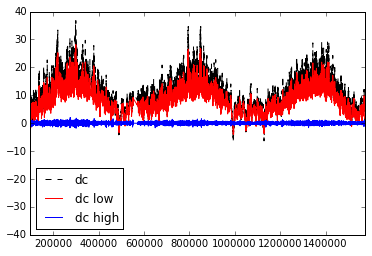

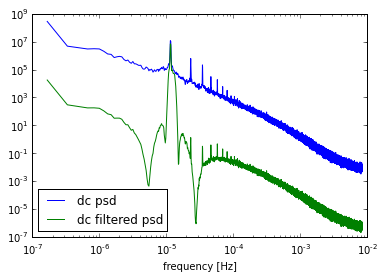

In [269]:
fc = 1./(24.*3600.)
dt = 60.
fs = 1./dt
fny = fs/2
nfft = 100000
args = {'NFFT':nfft,'Fs':fs,'noverlap':nfft/2.,'window':mlab.window_hanning}

#lowpass
wp = 1.35e-5/fny
ws = 1.5e-5/fny
N, wn = signal.ellipord(wp, ws, 1, 20)
b,a = signal.ellip(N, 1, 20, wn, output='ba', btype='lowpass')
dcl = signal.filtfilt(b, a, dc)

#highpass
wp = 1.1e-5/fny
ws = 1.e-5/fny
N, wn = signal.ellipord(wp, ws, 1, 20)
b,a = signal.ellip(N, 1, 20, wn, output='ba', btype='highpass')
dcf = signal.filtfilt(b, a, dcl)


plt.plot(t, dc, 'k--', label='dc')
plt.plot(t, dcl, 'r', label='dc low')
plt.plot(t, dch, 'b', label='dc high')
plt.xlim(100000,len(dc))
plt.ylim(-40, 40)
plt.legend(loc=3)

Gxx = mlab.psd(dc, **args)
Gff = mlab.psd(dcf, **args)
plt.figure()
plt.loglog(Gxx[1], Gxx[0], label='dc psd')
plt.loglog(Gff[1], Gff[0], label='dc filtered psd')
plt.xlabel('frequency [Hz]')
plt.legend(loc=3)


A pretty narrow bandpass filter was constructed, only a small range of frequencies around 1.15e-5 Hz (daily frequency) is left, all the other frequencies are attenuated by 4 orders of magnitude or more.

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

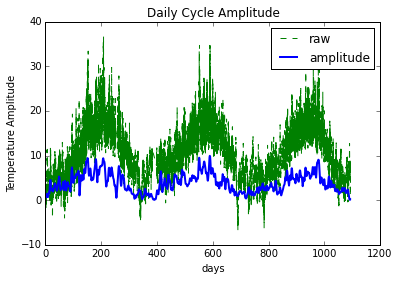

In [292]:
days = len(dc)/(24*60)
maxTf = np.zeros(days)
minTf = np.zeros(days)

tdays = np.arange(0,days,1)

for i in range(0, days, 1):
    dayf = dcf[i*24*60:(i+1)*24*60]
    maxTf[i] = np.max(dayf)
    minTf[i] = np.min(dayf)
    
Tampf = maxTf-minTf

plt.plot(t/(24*60), dc, 'g--', label='raw')
plt.plot(tdays, Tampf, label='amplitude', linewidth=2)
plt.legend()
plt.title('Daily Cycle Amplitude')
plt.xlabel('days')
plt.ylabel('Temperature Amplitude')

The amplitudes increase in the summer when the day to night temperatures have the largest contrast. Where the sun really heats up the ground. in the winter this temperature change is less drastic between night and day, but it still above zero.
Even in the raw spectrum the spread in temperature in summer months (high temp region) is much larger than that of the winter.